<a href="https://colab.research.google.com/github/ArnauMartinez/Montse-Meritxell/blob/main/analisi_dades_mobilitat_estudiants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Factors that determine whether students use public or private transportation systems to go to the university

Importing dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('/content/Datathon_Results_MOBILITY_2022_original_Students.xlsx')

#Rename columns
df.rename(columns={"Please indicate the postal code from where you usually start your trip to the university:":'Postal code'}, inplace=True)
df.rename(columns={"Please indicate the main reasons why you use the transport combinations you have marked in the previous question. (Select up to a maximum of two options) [It's the fastest]":'Fastest'}, inplace=True)
df.rename(columns={"Please indicate the main reasons why you use the transport combinations you have marked in the previous question. (Select up to a maximum of two options) [It's the cheapest]":'Cheapest'}, inplace=True)
df.rename(columns={"Please indicate the main reasons why you use the transport combinations you have marked in the previous question. (Select up to a maximum of two options) [It's the most comfortable]":'Most comfortable'}, inplace=True)
df.rename(columns={"Please indicate the main reasons why you use the transport combinations you have marked in the previous question. (Select up to a maximum of two options) [It's the only option]":'Only option'}, inplace=True)
df.rename(columns={"Please indicate the main reasons why you use the transport combinations you have marked in the previous question. (Select up to a maximum of two options) [It has a lower environmental impact]":'Environmental impact'}, inplace=True)
df.rename(columns={"Select the center where you study:":'Faculty'}, inplace=True)

#Convert atributes yes/no to true/false
map_dict = {'Yes': True, 'No': False}

columns_to_map = ['Fastest', 'Cheapest', 'Most comfortable', 'Only option', 'Environmental impact']
for col in columns_to_map:
    df[col] = df[col].map(map_dict)

Create a simple graph with percentages of each factor


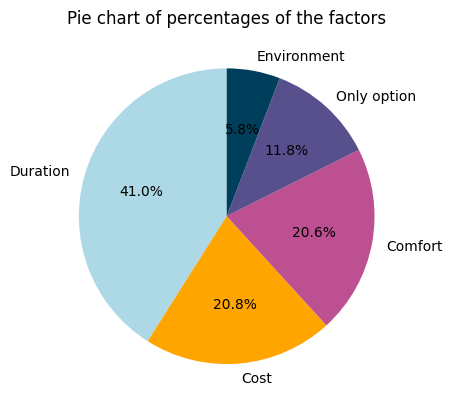

In [ ]:
# Select factor columns for the pie chart
selected_columns = ['Fastest', 'Cheapest', 'Most comfortable', 'Only option', 'Environmental impact']
selected_data = df[selected_columns]

# Calculate the percentage of True values for each factor
percentage_true = selected_data.mean() * 100

plt.pie(percentage_true, labels=['Duration', 'Cost', 'Comfort', 'Only option', 'Environment'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange', '#bc5090', '#58508d', '#003f5c'])
plt
plt.title('Pie chart of percentages of the factors')
plt.show()

Factors group by type of transport used

In [ ]:
#Rename the columns of transport
df.rename(columns={"Indicate the modes of transport you use to go to the UPC. (only mark the stages that last more than 5 minutes, up to a maximum of 3 stages) [Stage 1]" : 'Used_transport1'}, inplace=True)
df.rename(columns={"Indicate the modes of transport you use to go to the UPC. (only mark the stages that last more than 5 minutes, up to a maximum of 3 stages) [Stage 2]" : 'Used_transport2'}, inplace=True)
df.rename(columns={"Indicate the modes of transport you use to go to the UPC. (only mark the stages that last more than 5 minutes, up to a maximum of 3 stages) [Stage 3]" : 'Used_transport3'}, inplace=True)

#Creat empty df for factors
data = {
    'Type of vehicle': ['Bus', 'Tram', 'On foot', 'FGC', 'Bicycle', 'Underground', 'Renfe', 'Combustion vehicle'],
    'Fastest' : [0, 0, 0, 0, 0, 0, 0, 0],
    'Cheapest' : [0, 0, 0, 0, 0, 0, 0, 0],
    'Most comfortable': [0, 0, 0, 0, 0, 0, 0, 0],
    'Only option' : [0, 0, 0, 0, 0, 0, 0, 0],
    'Environmental impact' : [0, 0, 0, 0, 0, 0, 0, 0],

}

#Creat empty df for way of transport
data2 = {
    'Factors': ['Fastest', 'Cheapest', 'Most comfortable', 'Only option', 'Environmental impact'],
    'Bus' : [0, 0, 0, 0, 0],
    'Tram' : [0, 0, 0, 0, 0],
    'On foot': [0, 0, 0, 0, 0],
    'FGC' : [0, 0, 0, 0, 0],
    'Bicycle' : [0, 0, 0, 0, 0],
    'Underground': [0, 0, 0, 0, 0],
    'Renfe': [0, 0, 0, 0, 0],
    'Combustion vehicle': [0, 0, 0, 0, 0],
}

Bus

In [ ]:
bus_selected_data = pd.DataFrame(df[(df['Used_transport1'] == 'Bus') | (df['Used_transport2'] == 'Bus') | (df['Used_transport3'] == 'Bus')])

# Select factor columns for the pie chart
selected_columns = ['Fastest', 'Cheapest', 'Most comfortable', 'Only option', 'Environmental impact']
selected_data_bus = bus_selected_data[selected_columns]

percentatge = selected_data_bus.mean() * 100

data['Fastest'][0] = percentatge[0]
data['Cheapest'][0] = percentatge[1]
data['Most comfortable'][0] = percentatge[2]
data['Only option'][0] = percentatge[3]
data['Environmental impact'][0] = percentatge[4]

for i in range(5):
  data2['Bus'][i] = percentatge[i]


Tram

In [ ]:
tram_selected_data = pd.DataFrame(df[(df['Used_transport1'] == 'Tram') | (df['Used_transport2'] == 'Tram') | (df['Used_transport3'] == 'Tram')])

selected_data_tram = tram_selected_data[selected_columns]

percentatge = selected_data_tram.mean() * 100

data['Fastest'][1] = percentatge[0]
data['Cheapest'][1] = percentatge[1]
data['Most comfortable'][1] = percentatge[2]
data['Only option'][1] = percentatge[3]
data['Environmental impact'][1] = percentatge[4]

for i in range(5):
  data2['Tram'][i] = percentatge[i]

On foot

In [ ]:
foot_selected_data = pd.DataFrame(df[(df['Used_transport1'] == 'On foot') | (df['Used_transport2'] == 'On foot') | (df['Used_transport3'] == 'On foot')])

selected_data_foot = foot_selected_data[selected_columns]

percentatge = selected_data_foot.mean() * 100

data['Fastest'][2] = percentatge[0]
data['Cheapest'][2] = percentatge[1]
data['Most comfortable'][2] = percentatge[2]
data['Only option'][2] = percentatge[3]
data['Environmental impact'][2] = percentatge[4]

for i in range(5):
  data2['On foot'][i] = percentatge[i]

FGC

In [ ]:
fgc_selected_data = pd.DataFrame(df[(df['Used_transport1'] == 'FGC') | (df['Used_transport2'] == 'FGC') | (df['Used_transport3'] == 'FGC')])

# Select factor columns for the pie chart
selected_data_fgc = fgc_selected_data[selected_columns]

percentatge = selected_data_fgc.mean() * 100

data['Fastest'][3] = percentatge[0]
data['Cheapest'][3] = percentatge[1]
data['Most comfortable'][3] = percentatge[2]
data['Only option'][3] = percentatge[3]
data['Environmental impact'][3] = percentatge[4]

for i in range(5):
  data2['FGC'][i] = percentatge[i]

Bicycle

In [ ]:
bicycle_selected_data = pd.DataFrame(df[(df['Used_transport1'] == 'Bicycle') | (df['Used_transport2'] == 'Bicycle') | (df['Used_transport3'] == 'Bicycle')])

# Select factor columns for the pie chart
selected_data_bicycle = bicycle_selected_data[selected_columns]

percentatge = selected_data_bicycle.mean() * 100

data['Fastest'][4] = percentatge[0]
data['Cheapest'][4] = percentatge[1]
data['Most comfortable'][4] = percentatge[2]
data['Only option'][4] = percentatge[3]
data['Environmental impact'][4] = percentatge[4]

for i in range(5):
  data2['Bicycle'][i] = percentatge[i]

Underground

In [ ]:
underground_selected_data = pd.DataFrame(df[(df['Used_transport1'] == 'Underground') | (df['Used_transport2'] == 'Underground') | (df['Used_transport3'] == 'Underground')])

# Select factor columns for the pie chart
selected_data_underground = underground_selected_data[selected_columns]

percentatge = selected_data_underground.mean() * 100

data['Fastest'][5] = percentatge[0]
data['Cheapest'][5] = percentatge[1]
data['Most comfortable'][5] = percentatge[2]
data['Only option'][5] = percentatge[3]
data['Environmental impact'][5] = percentatge[4]

for i in range(5):
  data2['Underground'][i] = percentatge[i]

Renfe

In [ ]:
renfe_selected_data = pd.DataFrame(df[(df['Used_transport1'] == 'Renfe') | (df['Used_transport2'] == 'Renfe') | (df['Used_transport3'] == 'Renfe')])

# Select factor columns for the pie chart
selected_data_renfe = renfe_selected_data[selected_columns]

percentatge = selected_data_renfe.mean() * 100

data['Fastest'][6] = percentatge[0]
data['Cheapest'][6] = percentatge[1]
data['Most comfortable'][6] = percentatge[2]
data['Only option'][6] = percentatge[3]
data['Environmental impact'][6] = percentatge[4]

for i in range(5):
  data2['Renfe'][i] = percentatge[i]

Combustion vehicle

In [ ]:
combustion_vehicle_selected_data = pd.DataFrame(df[(df['Used_transport1'] == 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),') | (df['Used_transport2'] == 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),') | (df['Used_transport3'] == 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),')])

# Select factor columns for the pie chart
selected_data_combustion_vehicle = combustion_vehicle_selected_data[selected_columns]

percentatge = selected_data_combustion_vehicle.mean() * 100

data['Fastest'][7] = percentatge[0]
data['Cheapest'][7] = percentatge[1]
data['Most comfortable'][7] = percentatge[2]
data['Only option'][7] = percentatge[3]
data['Environmental impact'][7] = percentatge[4]

for i in range(5):
  data2['Combustion vehicle'][i] = percentatge[i]

**Percentage of factors of way of transport**

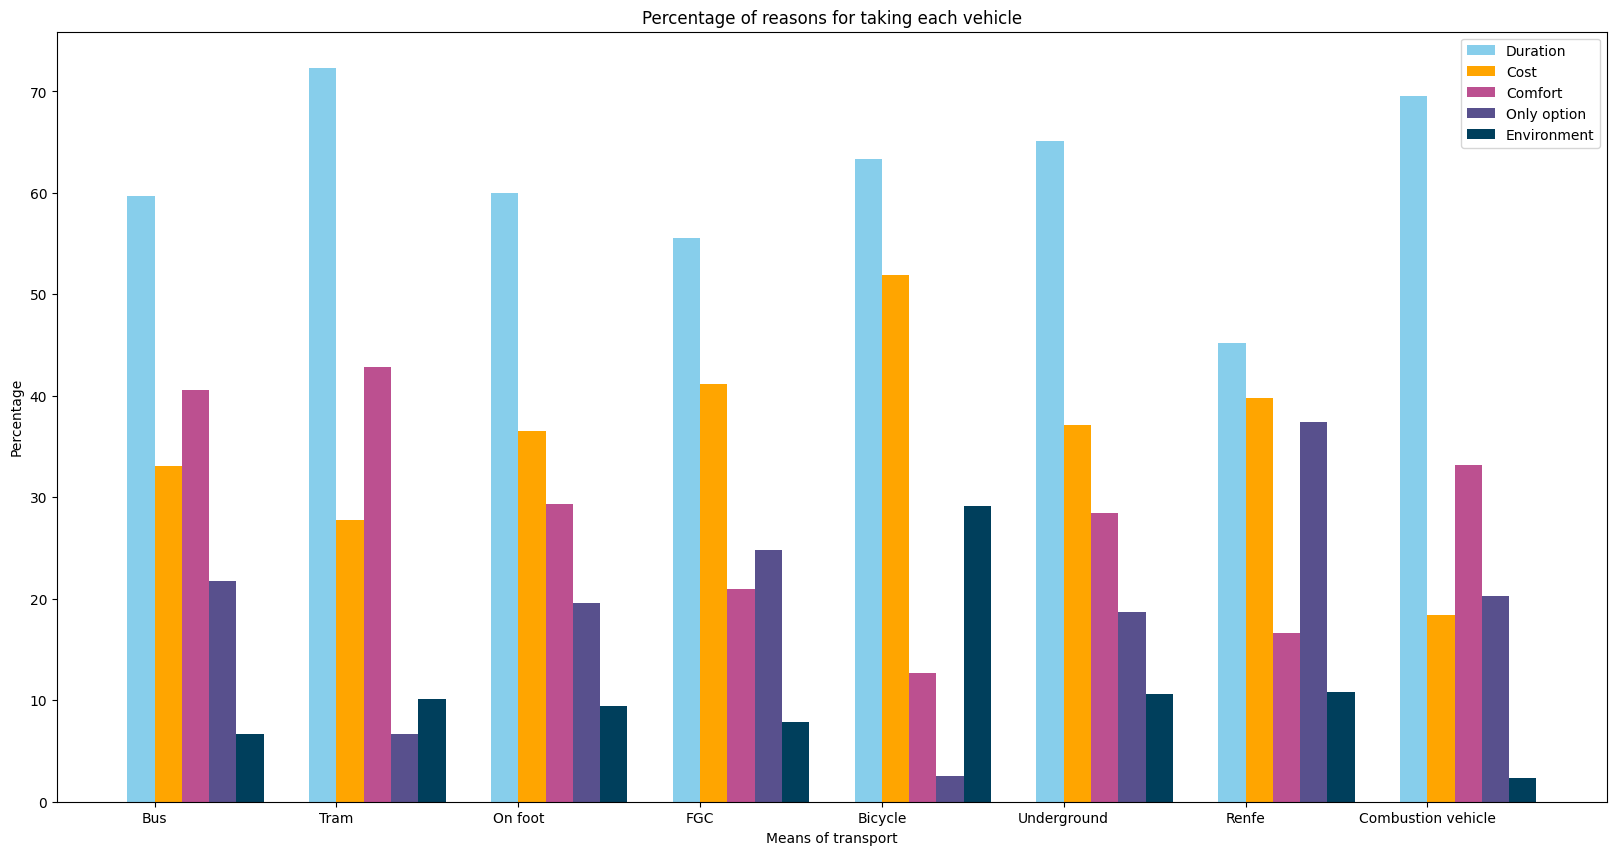

In [ ]:
plt.figure(figsize=(20, 10))

bar_width = 0.15

#Positions data in plot
bar_positions1 = np.arange(len(data['Type of vehicle']))
bar_positions2 = bar_positions1 + bar_width
bar_positions3 = bar_positions2 + bar_width
bar_positions4 = bar_positions3 + bar_width
bar_positions5 = bar_positions4 + bar_width


#Graph dataset
plt.bar(bar_positions1, data['Fastest'], width=bar_width, label = 'Duration', color='skyblue')
plt.bar(bar_positions2, data['Cheapest'], width=bar_width, label = 'Cost', color='orange')
plt.bar(bar_positions3, data['Most comfortable'], width=bar_width, label = 'Comfort', color='#bc5090')
plt.bar(bar_positions4, data['Only option'], width=bar_width, label = 'Only option', color='#58508d')
plt.bar(bar_positions5, data['Environmental impact'], width=bar_width, label = 'Environment', color='#003f5c')


# Configuration of the graph
plt.title('Percentage of reasons for taking each vehicle')
plt.xlabel('Means of transport')
plt.ylabel('Percentage')
plt.xticks(bar_positions1 + bar_width / 2, data['Type of vehicle'])
plt.legend()

plt.show()

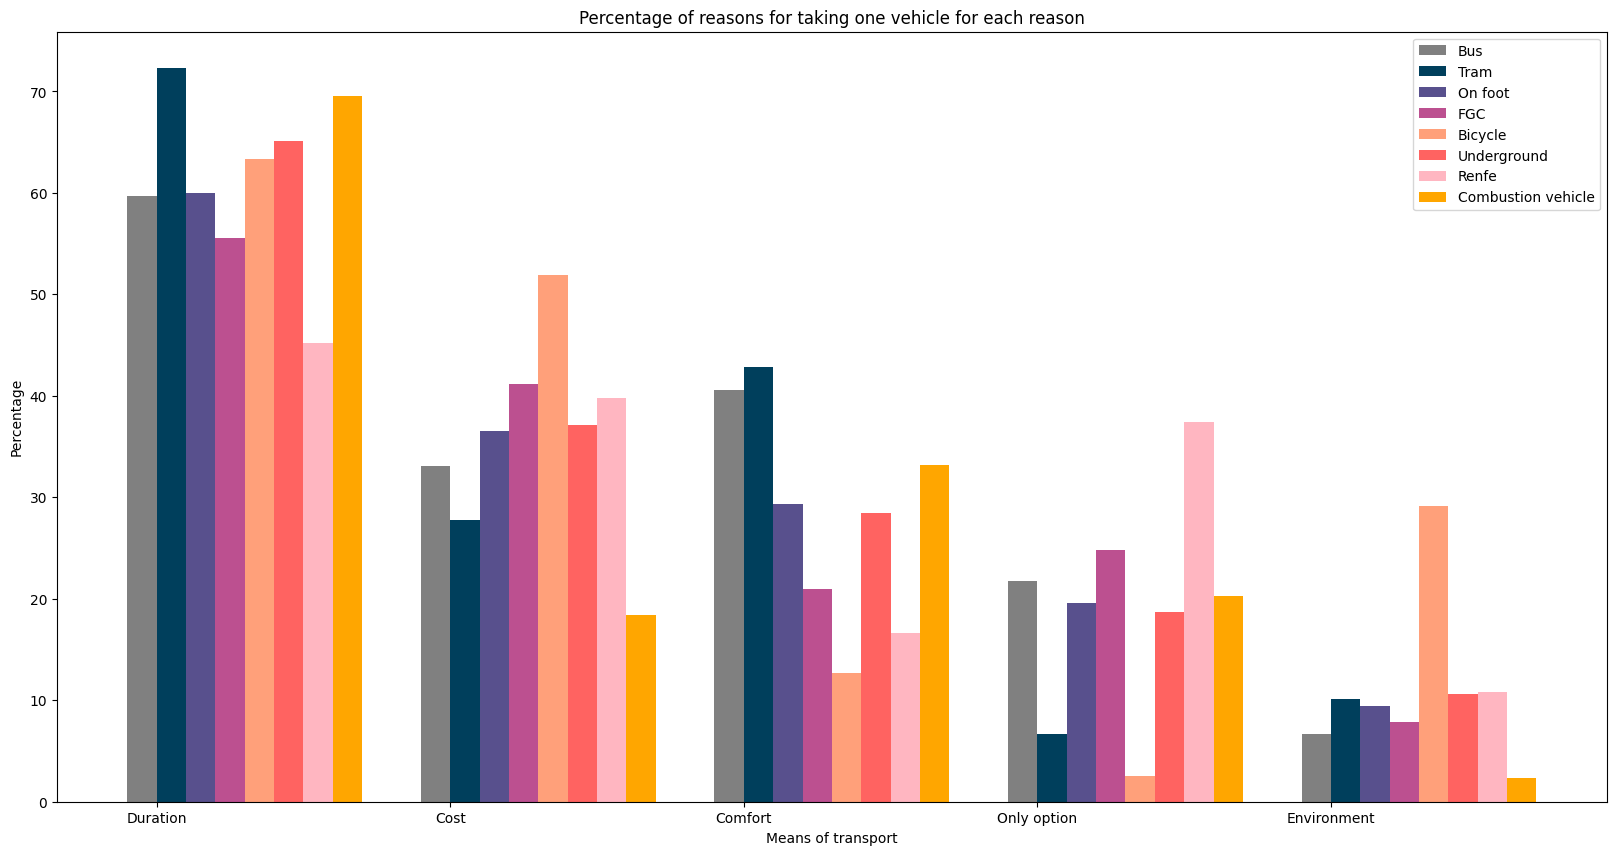

In [ ]:
plt.figure(figsize=(20, 10))

bar_width = 0.1

#Positions data in plot
bar_positions1 = np.arange(len(data2['Factors']))
bar_positions2 = bar_positions1 + bar_width
bar_positions3 = bar_positions2 + bar_width
bar_positions4 = bar_positions3 + bar_width
bar_positions5 = bar_positions4 + bar_width
bar_positions6 = bar_positions5 + bar_width
bar_positions7 = bar_positions6 + bar_width
bar_positions8 = bar_positions7 + bar_width


#Graph dataset
plt.bar(bar_positions1, data2['Bus'], width=bar_width, label = 'Bus', color='grey')
plt.bar(bar_positions2, data2['Tram'], width=bar_width, label = 'Tram', color='#003f5c')
plt.bar(bar_positions3, data2['On foot'], width=bar_width, label = 'On foot', color='#58508d')
plt.bar(bar_positions4, data2['FGC'], width=bar_width, label = 'FGC', color='#bc5090')
plt.bar(bar_positions5, data2['Bicycle'], width=bar_width, label = 'Bicycle', color='lightsalmon')
plt.bar(bar_positions6, data2['Underground'], width=bar_width, label = 'Underground', color='#ff6361')
plt.bar(bar_positions7, data2['Renfe'], width=bar_width, label = 'Renfe', color='lightpink')
plt.bar(bar_positions8, data2['Combustion vehicle'], width=bar_width, label = 'Combustion vehicle', color='#ffa600')


# Configuration of the graph
plt.title('Percentage of reasons for taking one vehicle for each reason')
plt.xlabel('Means of transport')
plt.ylabel('Percentage')
plt.xticks(bar_positions1 + bar_width / 2, ['Duration', 'Cost', 'Comfort', 'Only option', 'Environment'])
plt.legend()

# Mostrar el gráfico
plt.show()

# Data analysis

In [ ]:
def set_combination(row):
    return set([row['Used_transport1'], row['Used_transport2'], row['Used_transport3']])

df['Modes of transport you use to go to the UPC'] = df.apply(set_combination, axis=1)

This piece of code below cleanses the Faculty name, leaving only its sigles. :)

In [ ]:
def extract_faculty(faculty):
    return faculty.split("(")[1].split(")")[0]

# Apply the function to the 'Faculty' column
df['Faculty'] = df['Faculty'].apply(extract_faculty)

In [ ]:
nord_df =pd.DataFrame(df[
        (df['Faculty'] == 'ETSAB') |
        (df['Faculty'] == 'ETSEIB') |
        (df['Faculty'] == 'ETSECCPB') |
        (df['Faculty'] == 'FIB') |
        (df['Faculty'] == 'ETSETB') |
        (df['Faculty'] == 'FME') |
        (df['Faculty'] == 'EPSEB')
])

est_df =pd.DataFrame(df[
    (df['Faculty'] == 'EEBE')
])
altres_df =pd.DataFrame(df[
    (df['Faculty'] == 'FOOT')|
    (df['Faculty'] == 'FNB')|
    (df['Faculty'] == 'EPSEVG')|
    (df['Faculty'] == 'EETAC')|
    (df['Faculty'] == 'ETSAV')|
    (df['Faculty'] == 'EPSEM')|
    (df['Faculty'] == 'ESEIAAT')|
    (df['Faculty'] == 'EEABB')
])
# postal codes of each district of Barcelona (aprox)
postal_codes = [8001, 8002, 8003, 8004, 8005, 8006, 8007, 8008,
                8009, 8010, 8011, 8012, 8013, 8014, 8015, 8016,
                8017, 8018, 8019, 8020, 8021, 8022, 8023, 8024,
                8025, 8026, 8027, 8028, 8029, 8030, 8031, 8032,
                8033, 8034, 8035, 8036, 8037, 8038, 8039, 8040,
                8041, 8042]

districts = {'Sants-Montjuïc' : {8038, 8004, 8014, 8040},
            'Les Corts' : {8028, 8034, 8029},
            'Sarrià-Sant Gervasi' : {8017, 8021, 8022, 8006},
            'Eixample' : {8015, 8013, 8036, 8011, 8008, 8007, 8037, 8009},
            'Gràcia' : {8012, 8023, 8024},
            'Ciutat vella' : {8001, 8002, 8003, 8010, 8039},
            'Sant Martí' : {8018, 8005, 8019, 8020, 8026},
            'Horta-Guinardó' : {8041, 8025, 8032, 8035},
            'Sant Andreu' : {8027, 8030},
            'Nou barris' : {8016, 8031, 8042, 8033},
}

províncies = {
            'província Barcelona': [i for i in range(8043, 8980)],
             'província Girona': [i for i in range(17001, 17870)],
             'província Lleida': [i for i in range(22583, 25800)],
             'província Tarragona': [i for i in range(43001, 43897)]
}

How do people from Barcelona (city) exactly move from their home to their school?

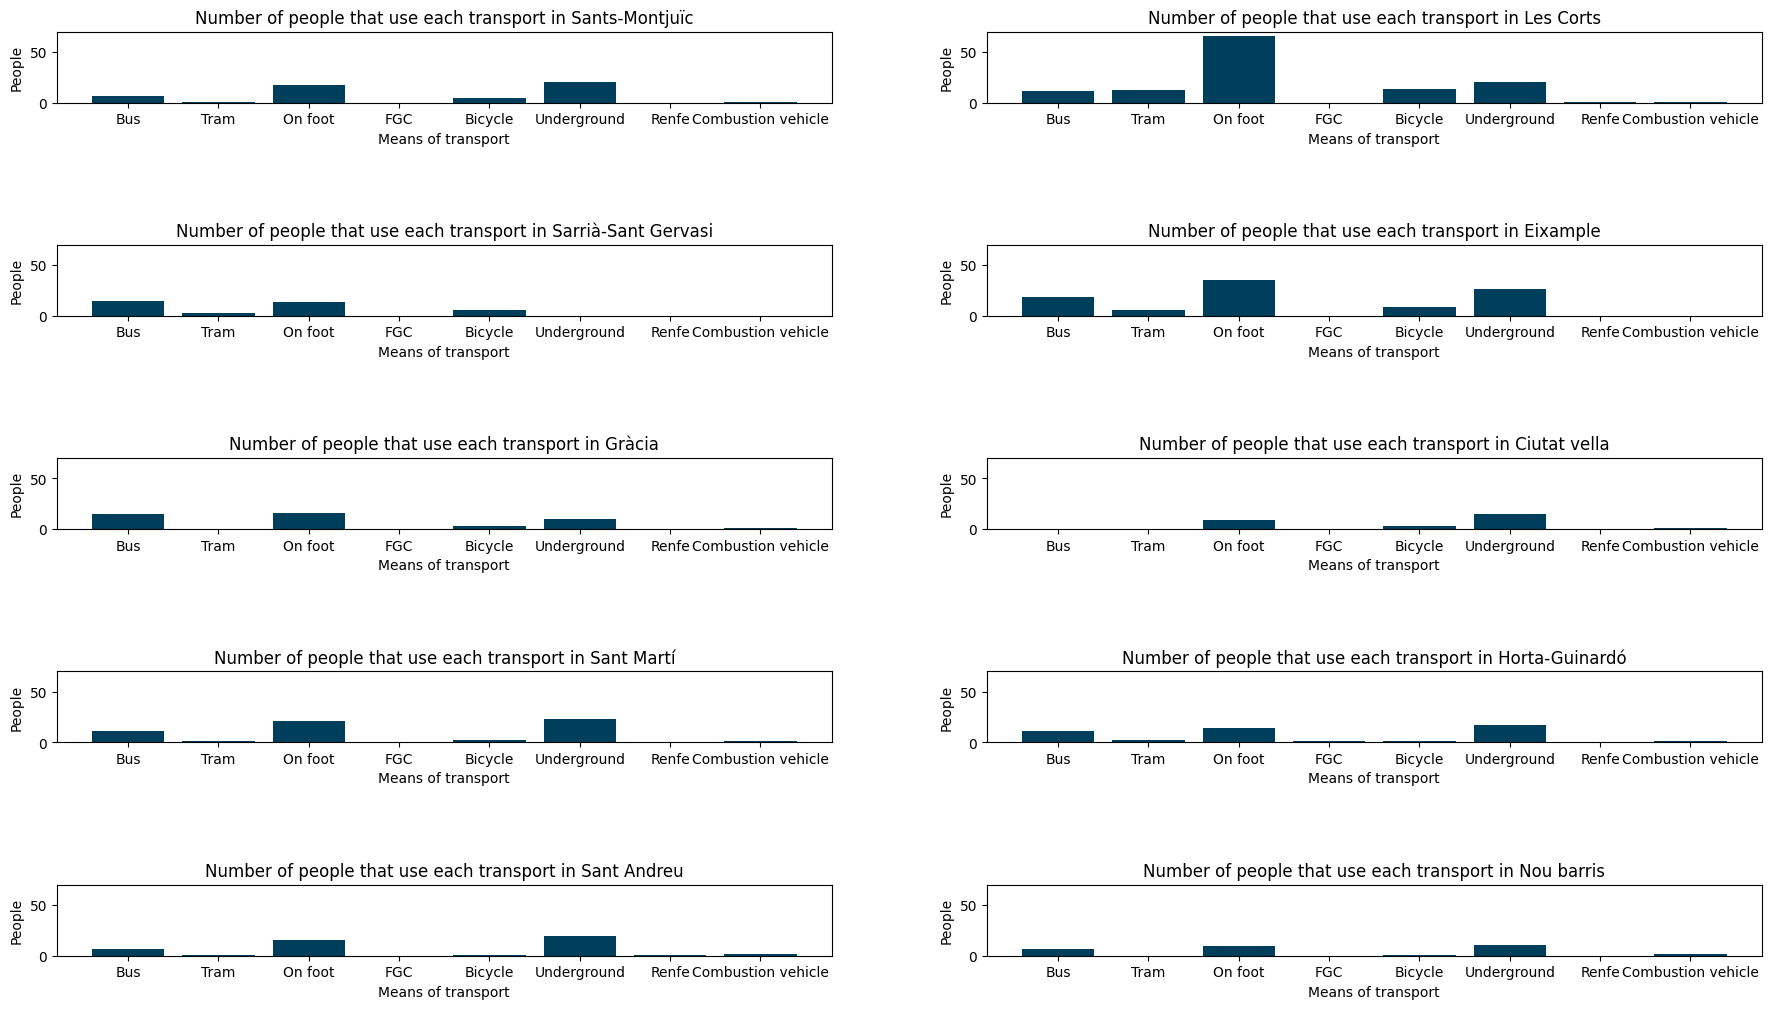

In [ ]:
#CAMPUS NORD
i, j = 0, 0

fig, axs = plt.subplots(5,2, figsize = (22,12))

for district, codes in districts.items():

  if j == 2:
    j = 0
    i+=1

  selected_data = nord_df[nord_df['Postal code'].isin(districts[district])]

  bus_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Bus') | (selected_data['Used_transport2'] == 'Bus') | (selected_data['Used_transport3'] == 'Bus')]))
  tram_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Tram') | (selected_data['Used_transport2'] == 'Tram') | (selected_data['Used_transport3'] == 'Tram')]))
  foot_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'On foot') | (selected_data['Used_transport2'] == 'On foot') | (selected_data['Used_transport3'] == 'On foot')]))
  fgc_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'FGC') | (selected_data['Used_transport2'] == 'FGC') | (selected_data['Used_transport3'] == 'FGC')]))
  bicycle_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Bicycle') | (selected_data['Used_transport2'] == 'Bicycle') | (selected_data['Used_transport3'] == 'Bicycle')]))
  underground_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Underground') | (selected_data['Used_transport2'] == 'Underground') | (selected_data['Used_transport3'] == 'Underground')]))
  renfe_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Renfe') | (selected_data['Used_transport2'] == 'Renfe') | (selected_data['Used_transport3'] == 'Renfe')]))
  combustion_vehicle_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),') | (selected_data['Used_transport2'] == 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),') | (selected_data['Used_transport3'] == 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),')]))


  data = {
      'ways_of_transport': ['Bus', 'Tram', 'On foot', 'FGC', 'Bicycle', 'Underground', 'Renfe', 'Combustion vehicle'],
      'num_people': [bus_data, tram_data, foot_data, fgc_data, bicycle_data, underground_data, renfe_data, combustion_vehicle_data],

  }

  # Configuration of the graph

  axs[i,j].bar(data['ways_of_transport'], data['num_people'], color='#003f5c')
  axs[i,j].set_title('Number of people that use each transport in '+ district)
  axs[i,j].set_ylim(0,70)
  axs[i,j].set_xlabel('Means of transport')
  axs[i,j].set_ylabel('People')


  j+=1


plt.subplots_adjust(hspace=2)

plt.show()


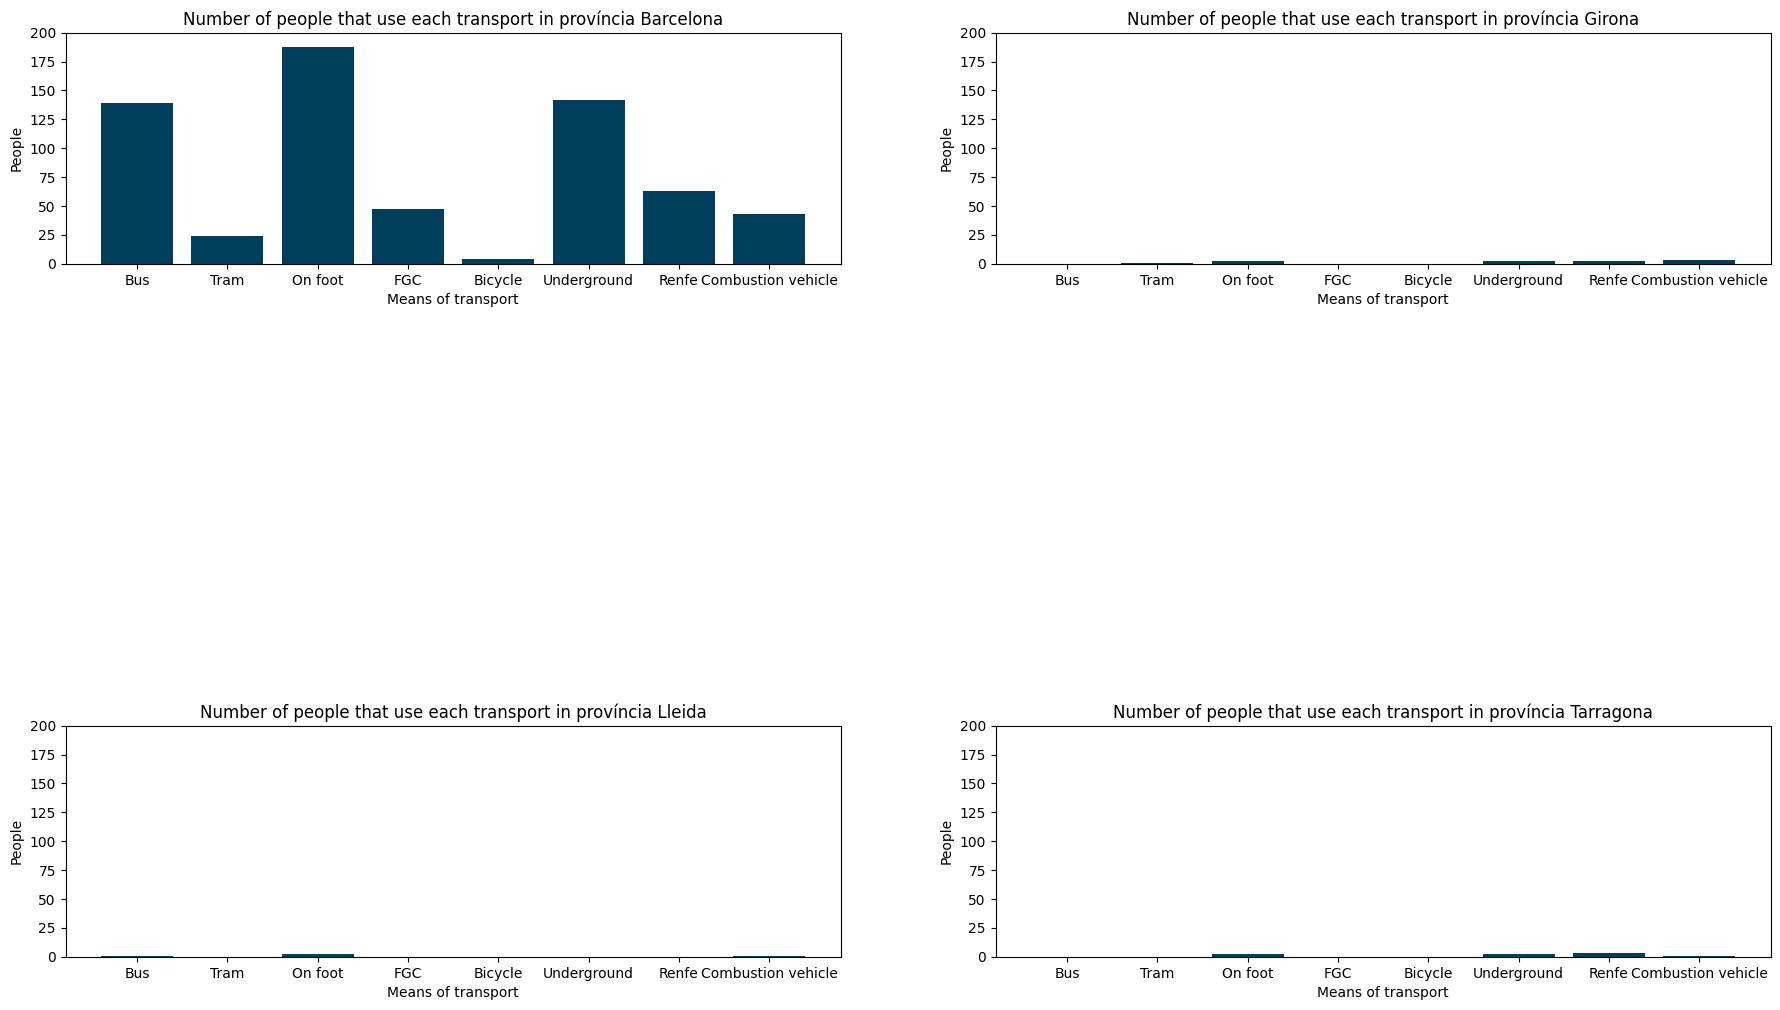

In [ ]:
#CAMPUS NORD
i, j = 0, 0

fig, axs = plt.subplots(2,2, figsize = (22,12))

for provincia, codes in províncies.items():

  if j == 2:
    j = 0
    i+=1

  selected_data = nord_df[nord_df['Postal code'].isin(províncies[provincia])]


  bus_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Bus') | (selected_data['Used_transport2'] == 'Bus') | (selected_data['Used_transport3'] == 'Bus')]))
  tram_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Tram') | (selected_data['Used_transport2'] == 'Tram') | (selected_data['Used_transport3'] == 'Tram')]))
  foot_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'On foot') | (selected_data['Used_transport2'] == 'On foot') | (selected_data['Used_transport3'] == 'On foot')]))
  fgc_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'FGC') | (selected_data['Used_transport2'] == 'FGC') | (selected_data['Used_transport3'] == 'FGC')]))
  bicycle_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Bicycle') | (selected_data['Used_transport2'] == 'Bicycle') | (selected_data['Used_transport3'] == 'Bicycle')]))
  underground_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Underground') | (selected_data['Used_transport2'] == 'Underground') | (selected_data['Used_transport3'] == 'Underground')]))
  renfe_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Renfe') | (selected_data['Used_transport2'] == 'Renfe') | (selected_data['Used_transport3'] == 'Renfe')]))
  combustion_vehicle_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),') | (selected_data['Used_transport2'] == 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),') | (selected_data['Used_transport3'] == 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),')]))


  data = {
      'ways_of_transport': ['Bus', 'Tram', 'On foot', 'FGC', 'Bicycle', 'Underground', 'Renfe', 'Combustion vehicle'],
      'num_people': [bus_data, tram_data, foot_data, fgc_data, bicycle_data, underground_data, renfe_data, combustion_vehicle_data],

  }



  # Configuration of the graph

  axs[i,j].bar(data['ways_of_transport'], data['num_people'], color='#003f5c')
  axs[i,j].set_title('Number of people that use each transport in '+ provincia)
  axs[i,j].set_ylim(0,200)
  axs[i,j].set_xlabel('Means of transport')
  axs[i,j].set_ylabel('People')

  j+=1


plt.subplots_adjust(hspace=2)

plt.show()


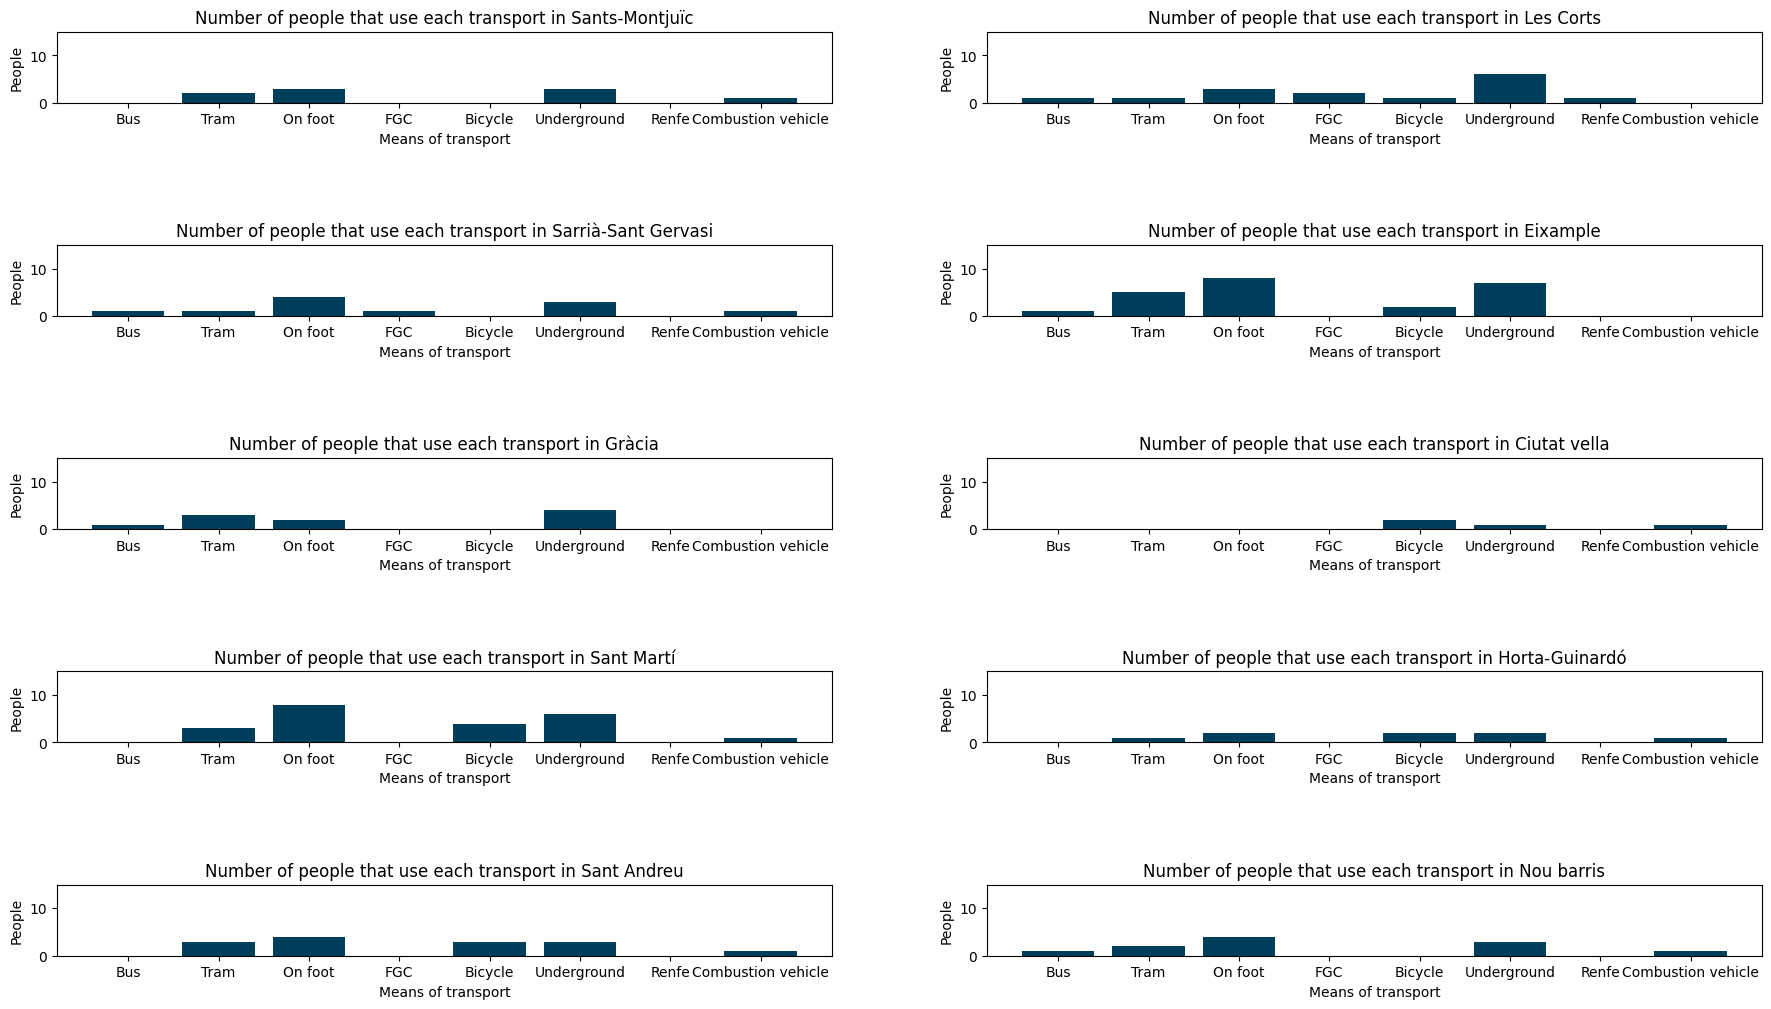

In [ ]:
#CAMPUS EST
i, j = 0, 0

fig, axs = plt.subplots(5,2, figsize = (22,12))

for district, codes in districts.items():

  if j == 2:
    j = 0
    i+=1

  selected_data = est_df[est_df['Postal code'].isin(districts[district])]

  bus_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Bus') | (selected_data['Used_transport2'] == 'Bus') | (selected_data['Used_transport3'] == 'Bus')]))
  tram_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Tram') | (selected_data['Used_transport2'] == 'Tram') | (selected_data['Used_transport3'] == 'Tram')]))
  foot_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'On foot') | (selected_data['Used_transport2'] == 'On foot') | (selected_data['Used_transport3'] == 'On foot')]))
  fgc_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'FGC') | (selected_data['Used_transport2'] == 'FGC') | (selected_data['Used_transport3'] == 'FGC')]))
  bicycle_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Bicycle') | (selected_data['Used_transport2'] == 'Bicycle') | (selected_data['Used_transport3'] == 'Bicycle')]))
  underground_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Underground') | (selected_data['Used_transport2'] == 'Underground') | (selected_data['Used_transport3'] == 'Underground')]))
  renfe_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Renfe') | (selected_data['Used_transport2'] == 'Renfe') | (selected_data['Used_transport3'] == 'Renfe')]))
  combustion_vehicle_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),') | (selected_data['Used_transport2'] == 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),') | (selected_data['Used_transport3'] == 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),')]))


  data = {
      'ways_of_transport': ['Bus', 'Tram', 'On foot', 'FGC', 'Bicycle', 'Underground', 'Renfe', 'Combustion vehicle'],
      'num_people': [bus_data, tram_data, foot_data, fgc_data, bicycle_data, underground_data, renfe_data, combustion_vehicle_data],

  }

  # Configuration of the graph

  axs[i,j].bar(data['ways_of_transport'], data['num_people'], color='#003f5c')
  axs[i,j].set_title('Number of people that use each transport in '+ district)
  axs[i,j].set_ylim(0,15)
  axs[i,j].set_xlabel('Means of transport')
  axs[i,j].set_ylabel('People')

  j+=1


plt.subplots_adjust(hspace=2)

plt.show()

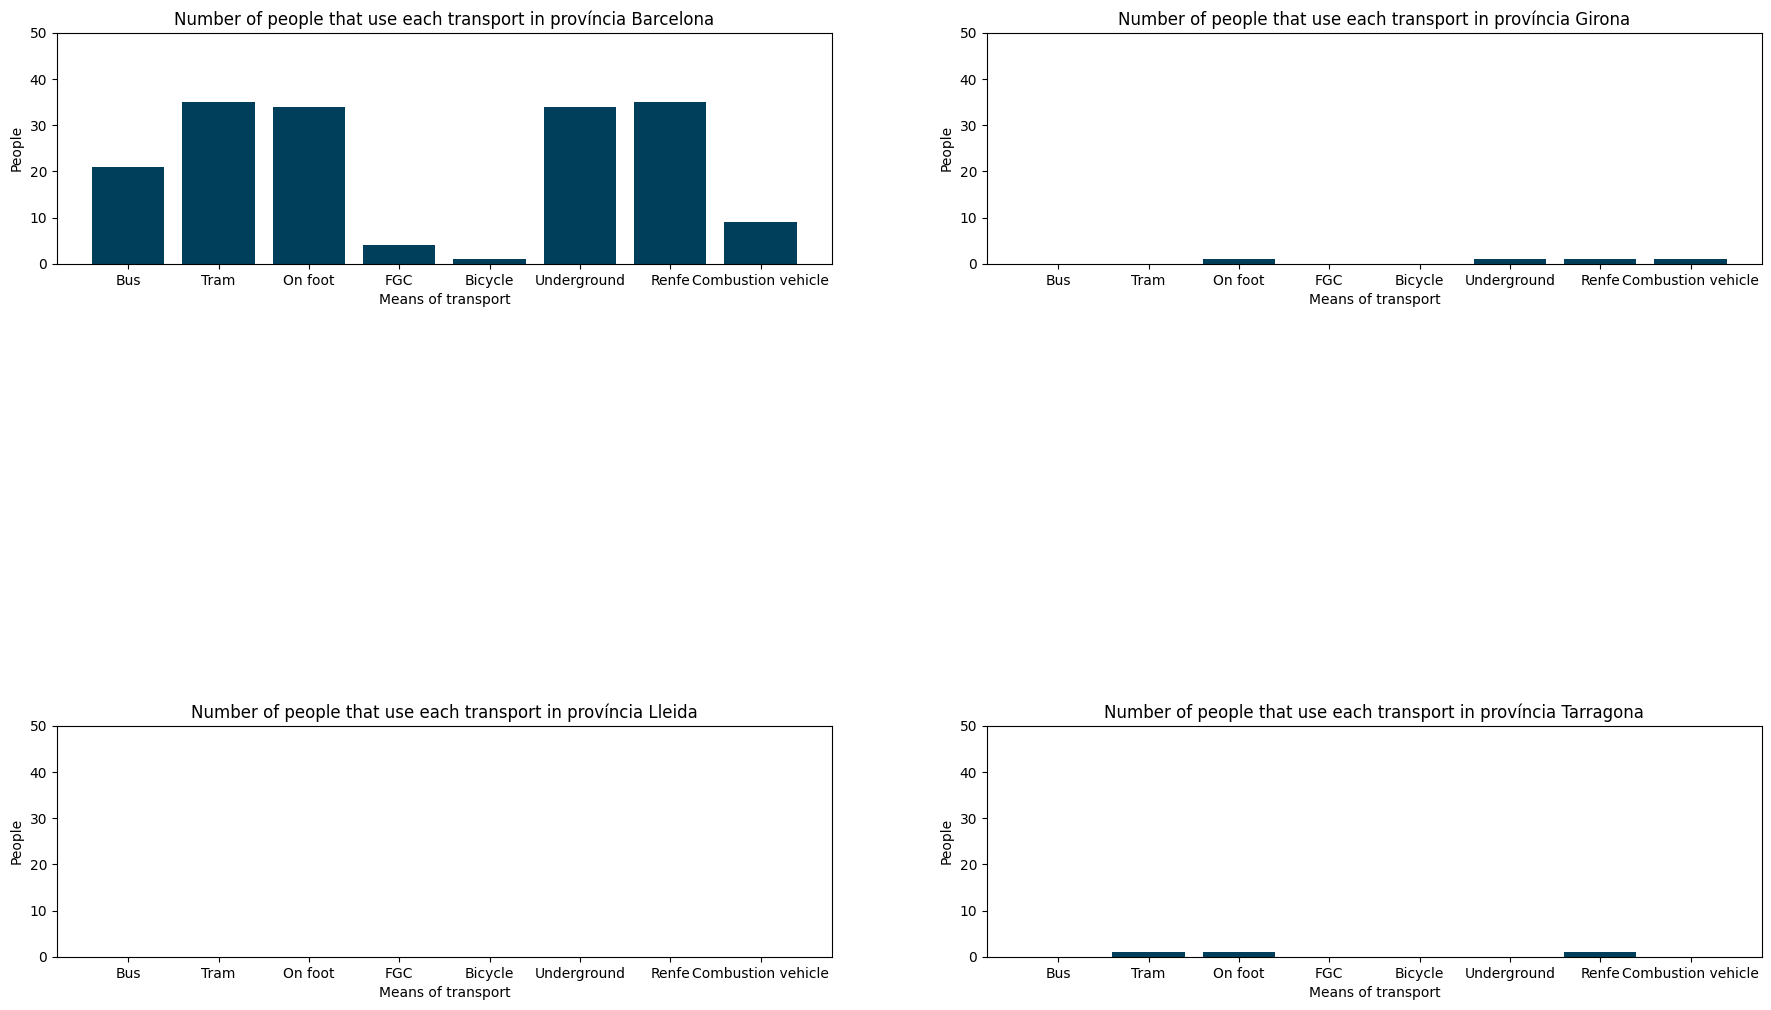

In [ ]:
#CAMPUS EST
i, j = 0, 0

fig, axs = plt.subplots(2,2, figsize = (22,12))

for provincia, codes in províncies.items():

  if j == 2:
    j = 0
    i+=1

  selected_data = est_df[est_df['Postal code'].isin(províncies[provincia])]


  bus_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Bus') | (selected_data['Used_transport2'] == 'Bus') | (selected_data['Used_transport3'] == 'Bus')]))
  tram_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Tram') | (selected_data['Used_transport2'] == 'Tram') | (selected_data['Used_transport3'] == 'Tram')]))
  foot_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'On foot') | (selected_data['Used_transport2'] == 'On foot') | (selected_data['Used_transport3'] == 'On foot')]))
  fgc_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'FGC') | (selected_data['Used_transport2'] == 'FGC') | (selected_data['Used_transport3'] == 'FGC')]))
  bicycle_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Bicycle') | (selected_data['Used_transport2'] == 'Bicycle') | (selected_data['Used_transport3'] == 'Bicycle')]))
  underground_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Underground') | (selected_data['Used_transport2'] == 'Underground') | (selected_data['Used_transport3'] == 'Underground')]))
  renfe_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Renfe') | (selected_data['Used_transport2'] == 'Renfe') | (selected_data['Used_transport3'] == 'Renfe')]))
  combustion_vehicle_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),') | (selected_data['Used_transport2'] == 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),') | (selected_data['Used_transport3'] == 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),')]))

  data = {
      'ways_of_transport': ['Bus', 'Tram', 'On foot', 'FGC', 'Bicycle', 'Underground', 'Renfe', 'Combustion vehicle'],
      'num_people': [bus_data, tram_data, foot_data, fgc_data, bicycle_data, underground_data, renfe_data, combustion_vehicle_data],

  }


  # Configuration of the graph

  axs[i,j].bar(data['ways_of_transport'], data['num_people'], color='#003f5c')
  axs[i,j].set_title('Number of people that use each transport in '+ provincia)
  axs[i,j].set_ylim(0,50)
  axs[i,j].set_xlabel('Means of transport')
  axs[i,j].set_ylabel('People')

  j+=1

plt.subplots_adjust(hspace=2)

plt.show()

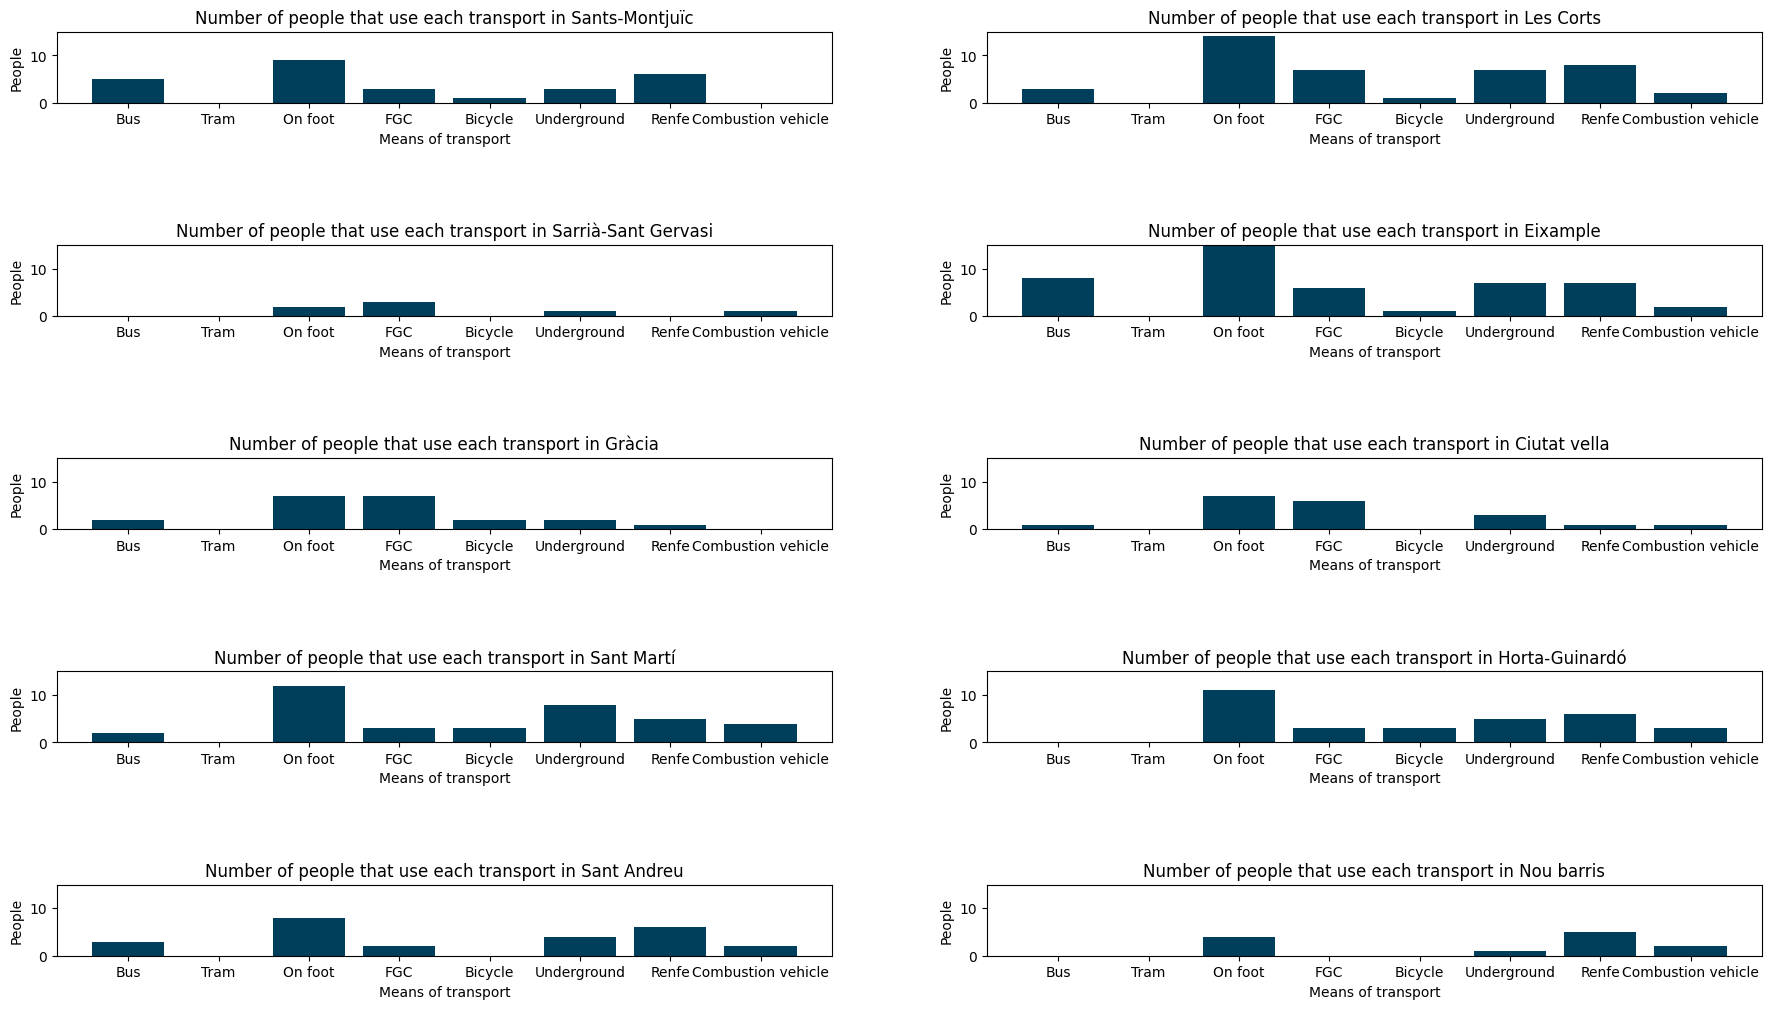

In [ ]:
#ALTRES CAMPUS
i, j = 0, 0

fig, axs = plt.subplots(5,2, figsize = (22,12))

for district, codes in districts.items():

  if j == 2:
    j = 0
    i+=1

  selected_data = altres_df[altres_df['Postal code'].isin(districts[district])]

  bus_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Bus') | (selected_data['Used_transport2'] == 'Bus') | (selected_data['Used_transport3'] == 'Bus')]))
  tram_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Tram') | (selected_data['Used_transport2'] == 'Tram') | (selected_data['Used_transport3'] == 'Tram')]))
  foot_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'On foot') | (selected_data['Used_transport2'] == 'On foot') | (selected_data['Used_transport3'] == 'On foot')]))
  fgc_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'FGC') | (selected_data['Used_transport2'] == 'FGC') | (selected_data['Used_transport3'] == 'FGC')]))
  bicycle_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Bicycle') | (selected_data['Used_transport2'] == 'Bicycle') | (selected_data['Used_transport3'] == 'Bicycle')]))
  underground_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Underground') | (selected_data['Used_transport2'] == 'Underground') | (selected_data['Used_transport3'] == 'Underground')]))
  renfe_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Renfe') | (selected_data['Used_transport2'] == 'Renfe') | (selected_data['Used_transport3'] == 'Renfe')]))
  combustion_vehicle_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),') | (selected_data['Used_transport2'] == 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),') | (selected_data['Used_transport3'] == 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),')]))


  data = {
      'ways_of_transport': ['Bus', 'Tram', 'On foot', 'FGC', 'Bicycle', 'Underground', 'Renfe', 'Combustion vehicle'],
      'num_people': [bus_data, tram_data, foot_data, fgc_data, bicycle_data, underground_data, renfe_data, combustion_vehicle_data],

  }

  # Configuration of the graph

  axs[i,j].bar(data['ways_of_transport'], data['num_people'], color='#003f5c')
  axs[i,j].set_title('Number of people that use each transport in '+ district)
  axs[i,j].set_ylim(0,15)
  axs[i,j].set_xlabel('Means of transport')
  axs[i,j].set_ylabel('People')

  j+=1


plt.subplots_adjust(hspace=2)

plt.show()

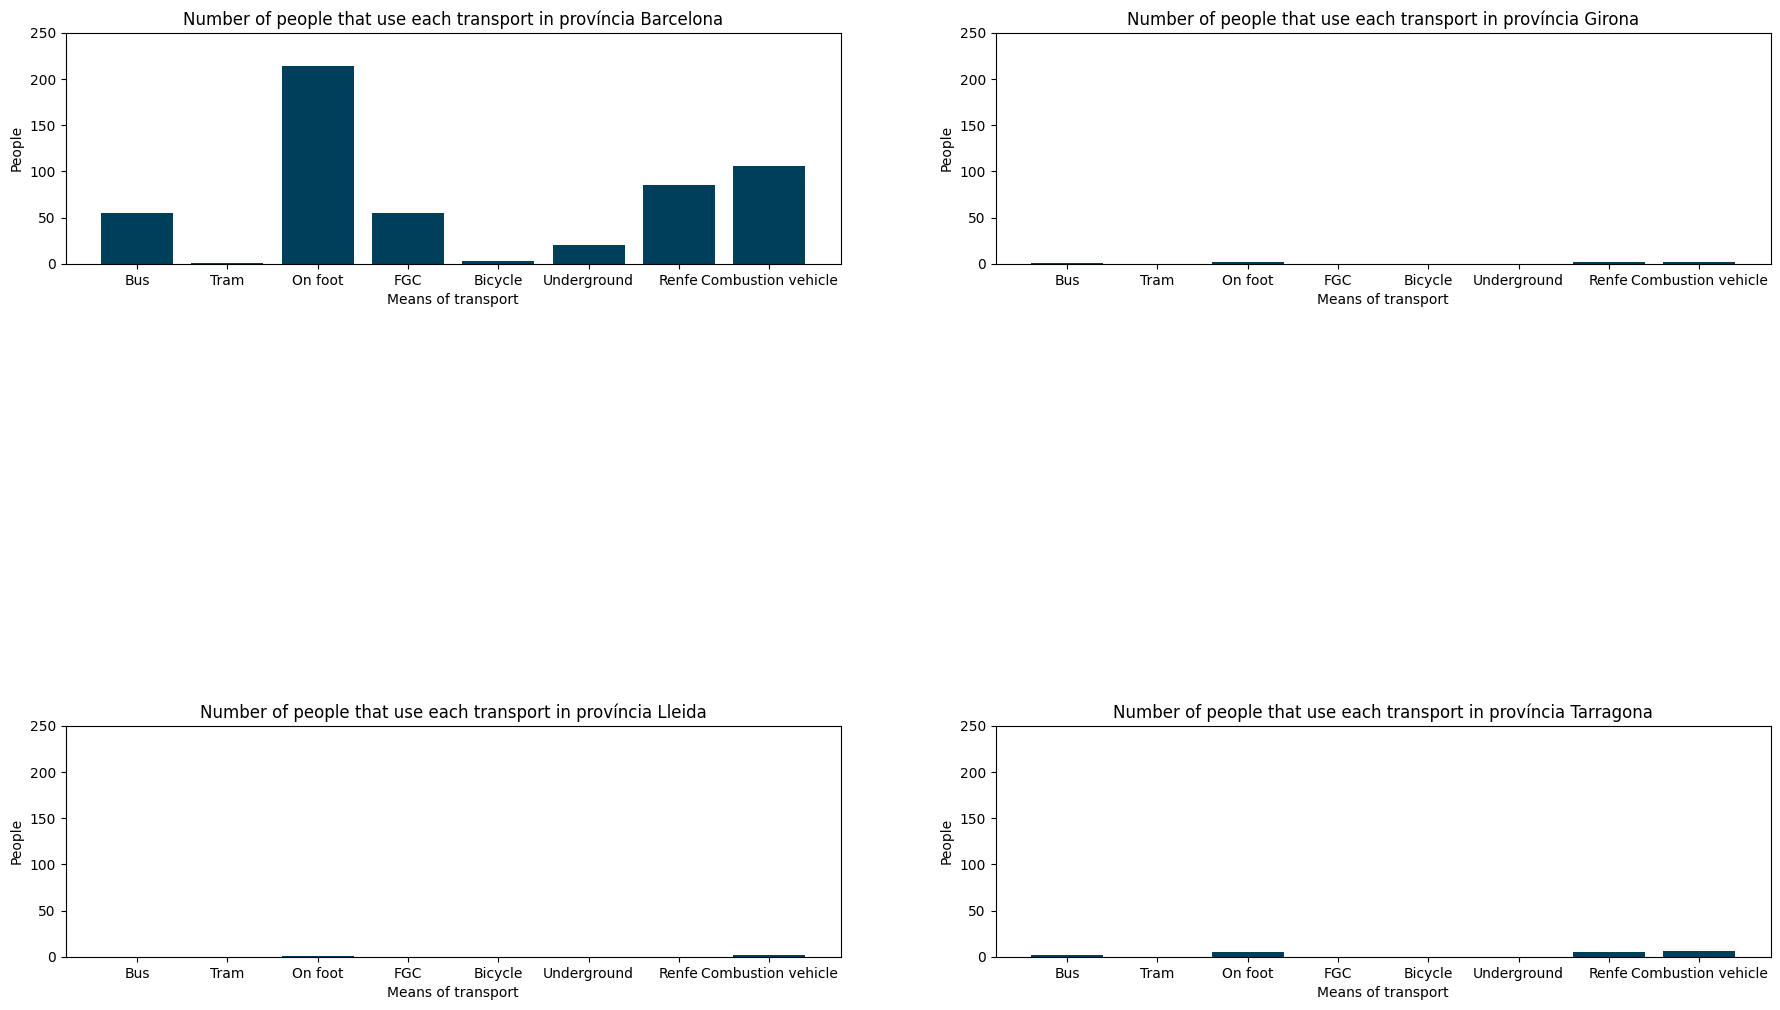

In [ ]:
#ALTRES CAMPUS
i, j = 0, 0

fig, axs = plt.subplots(2,2, figsize = (22,12))

for provincia, codes in províncies.items():

  if j == 2:
    j = 0
    i+=1

  selected_data = altres_df[altres_df['Postal code'].isin(províncies[provincia])]


  bus_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Bus') | (selected_data['Used_transport2'] == 'Bus') | (selected_data['Used_transport3'] == 'Bus')]))
  tram_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Tram') | (selected_data['Used_transport2'] == 'Tram') | (selected_data['Used_transport3'] == 'Tram')]))
  foot_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'On foot') | (selected_data['Used_transport2'] == 'On foot') | (selected_data['Used_transport3'] == 'On foot')]))
  fgc_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'FGC') | (selected_data['Used_transport2'] == 'FGC') | (selected_data['Used_transport3'] == 'FGC')]))
  bicycle_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Bicycle') | (selected_data['Used_transport2'] == 'Bicycle') | (selected_data['Used_transport3'] == 'Bicycle')]))
  underground_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Underground') | (selected_data['Used_transport2'] == 'Underground') | (selected_data['Used_transport3'] == 'Underground')]))
  renfe_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Renfe') | (selected_data['Used_transport2'] == 'Renfe') | (selected_data['Used_transport3'] == 'Renfe')]))
  combustion_vehicle_data = len(pd.DataFrame(selected_data[(selected_data['Used_transport1'] == 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),') | (selected_data['Used_transport2'] == 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),') | (selected_data['Used_transport3'] == 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),')]))

  data = {
      'ways_of_transport': ['Bus', 'Tram', 'On foot', 'FGC', 'Bicycle', 'Underground', 'Renfe', 'Combustion vehicle'],
      'num_people': [bus_data, tram_data, foot_data, fgc_data, bicycle_data, underground_data, renfe_data, combustion_vehicle_data],

  }


  # Configuration of the graph

  axs[i,j].bar(data['ways_of_transport'], data['num_people'], color='#003f5c')
  axs[i,j].set_title('Number of people that use each transport in '+ provincia)
  axs[i,j].set_ylim(0,250)
  axs[i,j].set_xlabel('Means of transport')
  axs[i,j].set_ylabel('People')

  j+=1

plt.subplots_adjust(hspace=2)

plt.show()

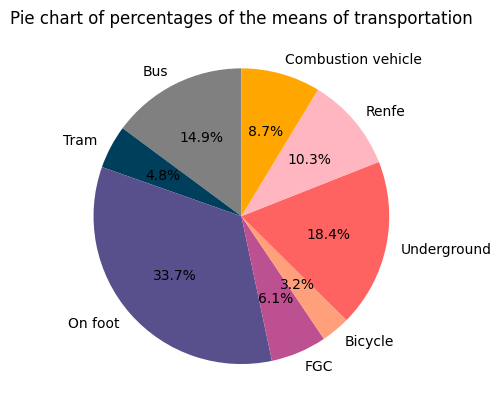

In [ ]:
# Select factor columns for the pie chart
transport_options = ['Bus', 'Tram', 'On foot', 'FGC', 'Bicycle', 'Underground', 'Renfe', 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),']
transport_list = [(mean,len(df[(df['Used_transport1'] == mean) | (df['Used_transport2'] == mean) | (df['Used_transport3'] == mean)])) for mean in transport_options]
total = sum([value for _, value in transport_list])

# Calculate the percentage of True values for each factor
percentage = [value/total for _, value in transport_list]

cols = ['grey', '#003f5c', '#58508d', '#bc5090', 'lightsalmon', '#ff6361', 'lightpink', '#ffa600']
plt.pie(percentage, labels=['Bus', 'Tram', 'On foot', 'FGC', 'Bicycle', 'Underground', 'Renfe', 'Combustion vehicle'], autopct='%1.1f%%', startangle=90, colors=cols)
plt
plt.title('Pie chart of percentages of the means of transportation')
plt.show()